In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = r"C:\Users\Fayaz Ahmed Malik\OneDrive\Desktop\Customer_Churn_Prediction\Customer_Churn_Prediction\data\customer_churn.csv"

# Load data
df = pd.read_csv(file_path)

# Set display options
pd.set_option('display.max_columns', None)

# Preview data
print("🔹 First 5 Rows:\n", df.head())
print("\n🔹 Dataset Shape:", df.shape)


🔹 First 5 Rows:
               Names   Age  Total_Purchase  Account_Manager  Years  Num_Sites  \
0  Cameron Williams  42.0        11066.80                0   7.22        8.0   
1     Kevin Mueller  41.0        11916.22                0   6.50       11.0   
2       Eric Lozano  38.0        12884.75                0   6.67       12.0   
3     Phillip White  42.0         8010.76                0   6.71       10.0   
4    Cynthia Norton  37.0         9191.58                0   5.56        9.0   

          Onboard_date                                           Location  \
0  2013-08-30 07:00:40      10265 Elizabeth Mission Barkerburgh, AK 89518   
1  2013-08-13 00:38:46  6157 Frank Gardens Suite 019 Carloshaven, RI 1...   
2  2016-06-29 06:20:07             1331 Keith Court Alyssahaven, DE 90114   
3  2014-04-22 12:43:12       13120 Daniel Mount Angelabury, WY 30645-4695   
4  2016-01-19 15:31:15                765 Tricia Row Karenshire, MH 71730   

                       Company  Churn  

In [9]:
# Basic Info
print("\n🔹 Data Info:")
df.info()


🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [10]:
# Summary stats
print("\n🔹 Statistical Summary (Numerical):")
print(df.describe())


🔹 Statistical Summary (Numerical):
              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372885  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


In [11]:
# 🔍 Check Missing Values
print("\n🔹 Missing Values (Total):")
print(df.isnull().sum())


🔹 Missing Values (Total):
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64


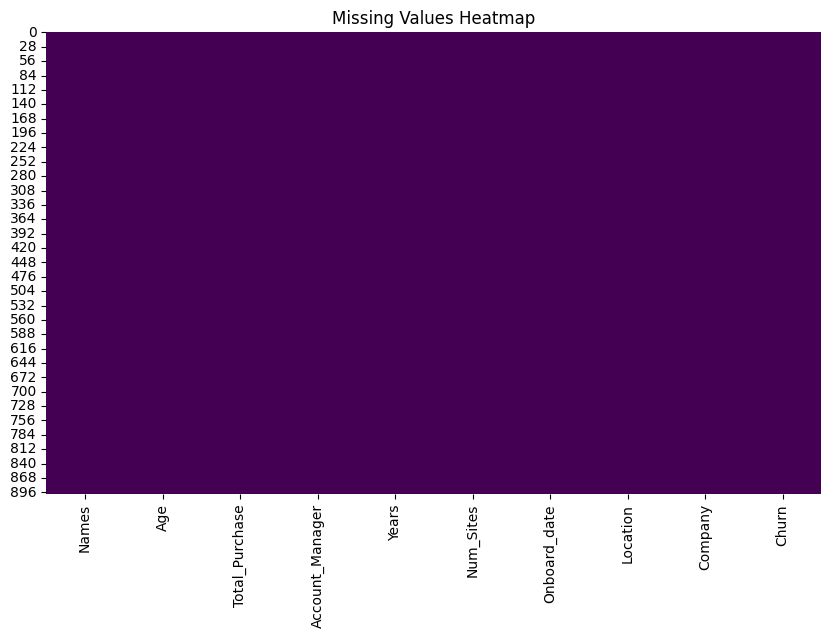

In [12]:
# Visualize Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
# 🔍 Separate columns by type
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n🔹 Categorical Columns:", cat_cols)
print("🔹 Numerical Columns:", num_cols)


🔹 Categorical Columns: ['Names', 'Onboard_date', 'Location', 'Company']
🔹 Numerical Columns: ['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn']


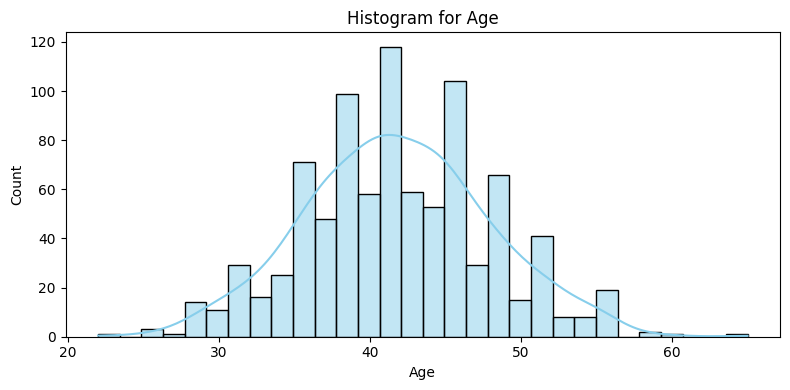

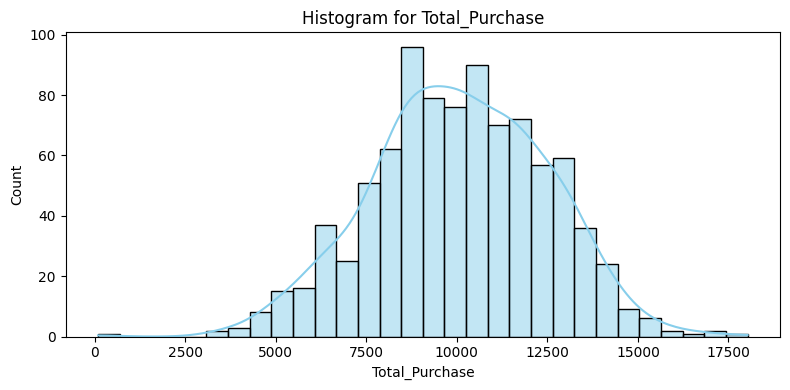

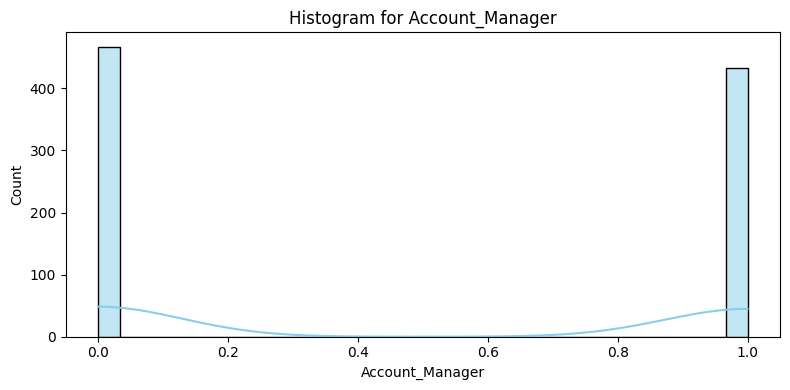

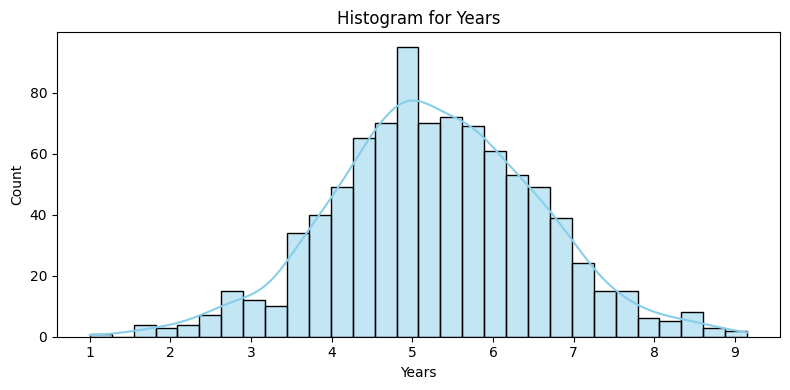

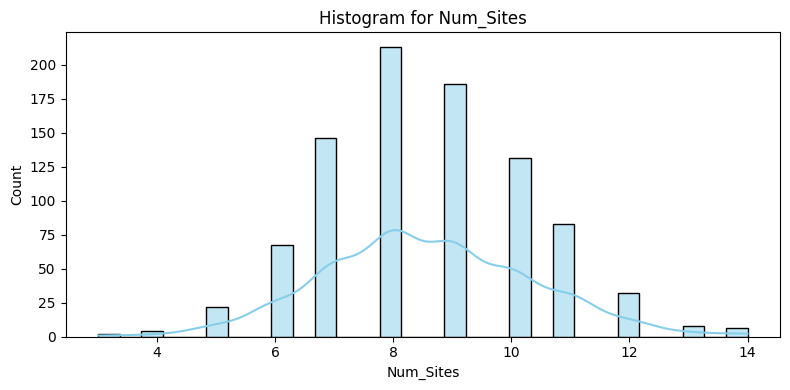

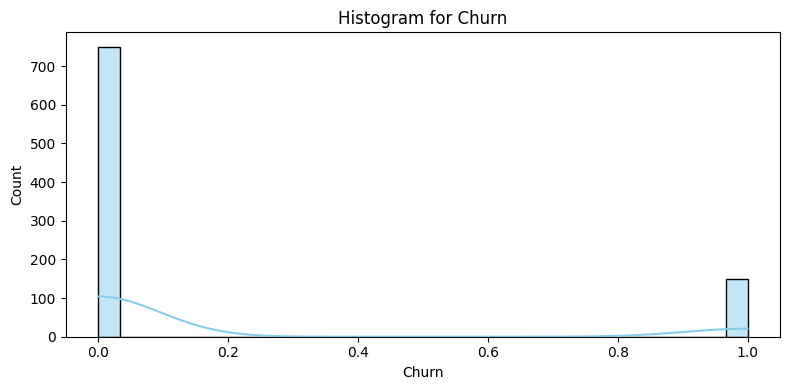

In [14]:
# 🔸 Histograms for Numerical Variables
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram for {col}')
    plt.tight_layout()
    plt.show()


C:\Users\Fayaz Ahmed Malik\AppData\Local\Temp\ipykernel_23044\1244536948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


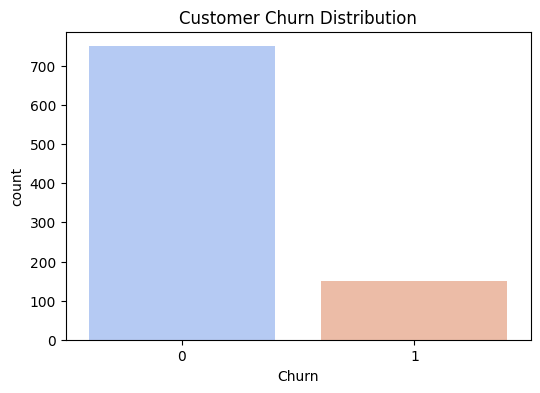

In [15]:
# 🔸 Target Distribution (assuming target column is 'Churn')
if 'Churn' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Churn', data=df, palette='coolwarm')
    plt.title('Customer Churn Distribution')
    plt.show()

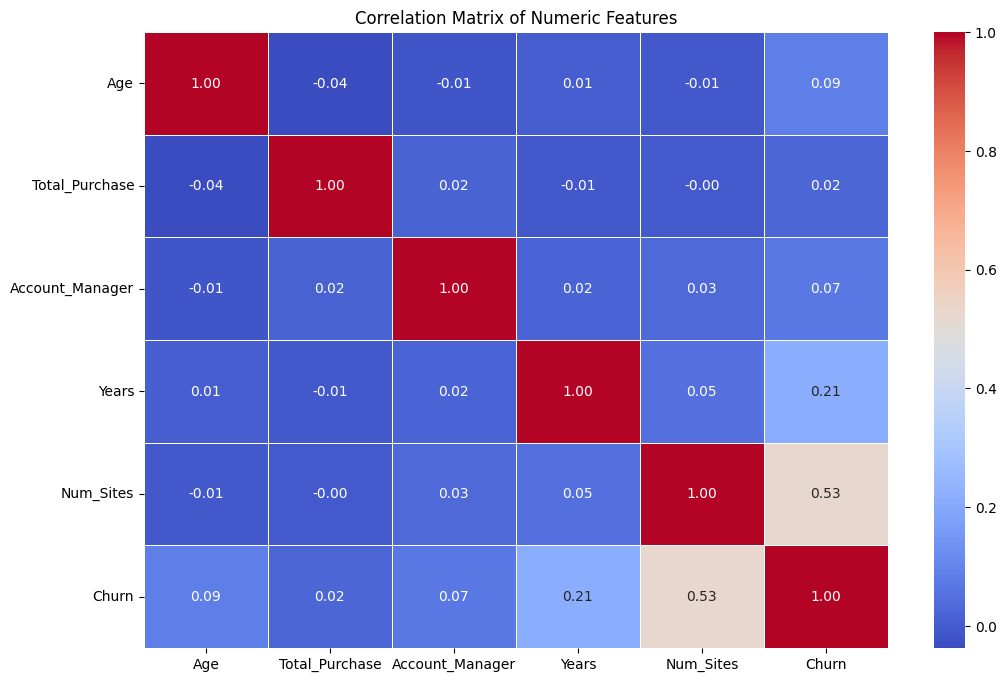

In [24]:
# 🔸 1. Correlation Heatmap (Only Numeric Columns)
plt.figure(figsize=(12,8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the raw dataset again (optional, for clean start)
file_path = r"C:\Users\Fayaz Ahmed Malik\OneDrive\Desktop\Customer_Churn_Prediction\Customer_Churn_Prediction\data\customer_churn.csv"
df = pd.read_csv(file_path)

# 🔸 Clean 'TotalCharges' (convert to numeric)
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 🔸 Remove rows with missing values
df_cleaned = df.dropna()

# 🔸 Encode target variable (assuming 'Churn' is Yes/No)
if 'Churn' in df_cleaned.columns:
    df_cleaned['Churn'] = df_cleaned['Churn'].map({'Yes': 1, 'No': 0})

# 🔸 Encode all categorical columns (except target)
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
for col in cat_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# 🔸 Show final shape
print("🔹 Final cleaned data shape:", df_cleaned.shape)

# 🔸 Save cleaned data to a new file
cleaned_path = r"C:\Users\Fayaz Ahmed Malik\OneDrive\Desktop\Customer_Churn_Prediction\Customer_Churn_Prediction\data\cleaned_churn.csv"
df_cleaned.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned data saved to: {cleaned_path}")

🔹 Final cleaned data shape: (900, 10)
✅ Cleaned data saved to: C:\Users\Fayaz Ahmed Malik\OneDrive\Desktop\Customer_Churn_Prediction\Customer_Churn_Prediction\data\cleaned_churn.csv


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Load data
file_path = r"C:\Users\Fayaz Ahmed Malik\OneDrive\Desktop\Customer_Churn_Prediction\Customer_Churn_Prediction\data\cleaned_churn.csv"
df = pd.read_csv(file_path)

# Clean and convert TotalCharges
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Feature set
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Helper: Evaluate function
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n🔷 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🔹 Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
evaluate_model("Logistic Regression", lr_model)

# 🔹 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model("Random Forest", rf_model)

# 🔹 XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model("XGBoost", xgb_model)

# 🔹 LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
evaluate_model("LightGBM", lgb_model)

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by StandardScaler.